In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# from copulas.multivariate import GaussianMultivariate

def alpha(f1,f2):
    y = 0.55*(f1-f2)-2.94
    return y


def alpha_IR(f1,f2):
    y = 1.64*(f1-f2)-2.82
    return y


def mJy_to_mag(F, F0):
    m = -2.5*np.log10(F*0.001/F0)
    return m


def e_mJy_to_mag(e_F, F):
    m = (2.5/np.log(10))*(e_F/F)
    return m


def mag_to_mJy(m, F0):
    F = F0*(10**(-m/2.5))/0.001
    return F


def e_mag_to_mJy(e_m, m, F0):
    m = (F0*np.log(10)/(0.001*2.5))*10**(-m/2.5)*(e_m)
    return m


def mag_to_Jy(m, F0):
    F = F0*(10**(-m/2.5))
    return F


def e_mag_to_Jy(e_m, m, F0):
    m = (F0*np.log(10)/(2.5))*10**(-m/2.5)*(e_m)
    return m

# c2d CLOUDS/CORES

In [3]:
c2d_CL = pd.read_csv("../../Archive/Phase_3_2__IRAC+MIPS_Classification/Data/c2d_CLOUDS_HREL.csv")
c2d_CO = pd.read_csv("../../Archive/Phase_3_2__IRAC+MIPS_Classification/Data/c2d_CORES_HREL.csv")
c2d_ST = pd.read_csv("../../Archive/Phase_3_1__IRAC_Only_Classification/Data_and_Results/c2d_STARS_HREL.csv")
c2d_ALL_1 = pd.merge_ordered(c2d_CL,c2d_CO)
c2d = pd.merge_ordered(c2d_ST,c2d_ALL_1)
c2d.columns

Index(['region', 'c2d_id', 'ra', 'dec', 'alpha', 'object_type', 'j_flux_c',
       'j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c',
       'ir1_flux_c', 'ir1_d_flux_c', 'ir2_flux_c', 'ir2_d_flux_c',
       'ir3_flux_c', 'ir3_d_flux_c', 'ir4_flux_c', 'ir4_d_flux_c',
       'mp1_flux_c', 'mp1_d_flux_c', 'mp2_flux_c', 'mp2_d_flux_c'],
      dtype='object')

### Determine Targets for dataframe

In [4]:
c2d_YSO_1 = pd.merge_ordered(c2d[c2d["object_type"]=='YSOc_star+dust(MP1)'],c2d[c2d["object_type"]=='YSOc_star+dust(IR4)'])
c2d_YSO_2 = pd.merge_ordered(c2d[c2d["object_type"]=='YSOc_star+dust(IR2)'],c2d[c2d["object_type"]=='YSOc_star+dust(IR3)'])
c2d_YSO_3 = pd.merge_ordered(c2d[c2d["object_type"]=='YSOc_star+dust(IR1)'],c2d[c2d["object_type"]=='YSOc_red'])
c2d_YSO_4 = pd.merge_ordered(c2d[c2d["object_type"]=='YSOc_PAH-em'],c2d[c2d["object_type"]=='YSOc'])
c2d_YSO_12 = pd.merge_ordered(c2d_YSO_1,c2d_YSO_2)
c2d_YSO_34 = pd.merge_ordered(c2d_YSO_3,c2d_YSO_4)
c2d_YSO = pd.merge_ordered(c2d_YSO_12,c2d_YSO_34)
c2d_YSO["Target"] = 0


c2d_EG_1 = pd.merge_ordered(c2d[c2d["object_type"]=='Galc_star+dust(MP1)'],c2d[c2d["object_type"]=='Galc_star+dust(IR4)'])
c2d_EG_2 = pd.merge_ordered(c2d[c2d["object_type"]=='Galc_star+dust(IR2)'],c2d[c2d["object_type"]=='Galc_star+dust(IR3)'])
c2d_EG_3 = pd.merge_ordered(c2d[c2d["object_type"]=='Galc_star+dust(IR1)'],c2d[c2d["object_type"]=='Galc_red'])
c2d_EG_4 = pd.merge_ordered(c2d[c2d["object_type"]=='Galc_PAH-em'],c2d[c2d["object_type"]=='Galc'])
c2d_EG_12 = pd.merge_ordered(c2d_EG_1,c2d_EG_2)
c2d_EG_34 = pd.merge_ordered(c2d_EG_3,c2d_EG_4)
c2d_EG = pd.merge_ordered(c2d_EG_12,c2d_EG_34)
c2d_EG["Target"] = 1


c2d_ST_1 = pd.merge_ordered(c2d[c2d["object_type"]=='star+dust(MP1)'],c2d[c2d["object_type"]=='star+dust(IR4)'])
c2d_ST_2 = pd.merge_ordered(c2d[c2d["object_type"]=='star+dust(IR2)'],c2d[c2d["object_type"]=='star+dust(IR3)'])
c2d_ST_3 = pd.merge_ordered(c2d[c2d["object_type"]=='Galc_star+dust(IR1)'],c2d[c2d["object_type"]=='star'])
c2d_ST_12 = pd.merge_ordered(c2d_ST_1,c2d_ST_2)
c2d_ST = pd.merge_ordered(c2d_ST_3,c2d_ST_12)
c2d_ST["Target"] = 2

c2d_1 = pd.merge_ordered(c2d_YSO,c2d_EG)
c2d_NEW = pd.merge_ordered(c2d_1,c2d_ST)

print(f"YSO shape: {c2d_YSO.shape}")
print(f"EG shape: {c2d_EG.shape}")
print(f"Star shape: {c2d_ST.shape}")

YSO shape: (1463, 25)
EG shape: (3621, 25)
Star shape: (409437, 25)


## Clean data

### IRAC+MIPS+2MASS

In [10]:
c2d_ALL = c2d_NEW[["object_type","region",'j_flux_c','j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c',\
    'ir1_flux_c', 'ir1_d_flux_c', 'ir2_flux_c', 'ir2_d_flux_c','ir3_flux_c', 'ir3_d_flux_c', 'ir4_flux_c', 'ir4_d_flux_c',\
        'mp1_flux_c', 'mp1_d_flux_c', "Target"]]
print(c2d_ALL.shape)
band_names = ['j_flux_c','j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c',\
    'ir1_flux_c', 'ir1_d_flux_c', 'ir2_flux_c', 'ir2_d_flux_c','ir3_flux_c', 'ir3_d_flux_c', 'ir4_flux_c', 'ir4_d_flux_c',\
        'mp1_flux_c', 'mp1_d_flux_c']
c2d_ALL.dropna(subset=band_names[:-2],inplace=True) # Drop all rows with nan values except for those with nan in mips
print(c2d_ALL.shape)

c2d_2MASS_fluxes = c2d_ALL[band_names].values.astype(float).transpose() 
# Convert magnitudes to flux
for i, F_0 in enumerate([1594,1594, 1024, 1024, 666.7,666.7,277.500, 277.500, 179.500, 179.500, 116.600, 116.600, 63.100, 63.100, 7.140, 7.140]):
    if i%2==0:
        c2d_ALL[band_names[i]] = mJy_to_mag(c2d_2MASS_fluxes[i],F_0) # Convert fluxes in a column to mags
    else:
        c2d_ALL[band_names[i]] = e_mJy_to_mag(c2d_2MASS_fluxes[i],c2d_2MASS_fluxes[i-1]) # Convert errors in a column to mag
c2d_ALL.dropna(subset=band_names[:-2],inplace=True) # Drop all nans in mags in all but mips
c2d_ALL.fillna(-99,inplace=True) # Fill nan MIPS values with -99
c2d_ALL['alpha'] = alpha_IR(c2d_ALL["ir2_flux_c"],c2d_ALL["ir4_flux_c"])
# Print shapes
shape_YSO = c2d_ALL[c2d_ALL["Target"]==0].shape
shape_EG = c2d_ALL[c2d_ALL["Target"]==1].shape
shape_ST = c2d_ALL[c2d_ALL["Target"]==2].shape
print(f"YSO shape: {shape_YSO}")
print(f"EG shape: {shape_EG}")
print(f"Star shape: {shape_ST}")
c2d_ALL.head()

(414521, 19)
(200326, 19)
YSO shape: (1130, 20)
EG shape: (376, 20)
Star shape: (195491, 20)


,object_type,region,j_flux_c,j_d_flux_c,h_flux_c,h_d_flux_c,ks_flux_c,ks_d_flux_c,ir1_flux_c,ir1_d_flux_c,ir2_flux_c,ir2_d_flux_c,ir3_flux_c,ir3_d_flux_c,ir4_flux_c,ir4_d_flux_c,mp1_flux_c,mp1_d_flux_c,Target,alpha
7,star,B18-1,16.226703,0.086016,14.902705,0.063884,14.446519,0.067003,14.015766,0.060529,13.920807,0.060891,13.945370,0.138185,14.158272,0.299568,-99.000000,-99.000000,2,-3.209443
10,star,B18-1,16.455881,0.117166,14.818786,0.070797,14.317551,0.058890,13.896169,0.060161,13.758890,0.056505,13.746242,0.147601,14.024244,0.236060,-99.000000,-99.000000,2,-3.255181
13,star,B18-1,16.274103,0.098003,15.061061,0.081991,14.692468,0.079007,14.378245,0.090699,14.358799,0.059313,14.286290,0.177096,13.962964,0.274082,-99.000000,-99.000000,2,-2.170831
15,star,B18-1,16.373190,0.099888,15.228055,0.091961,14.663416,0.087910,14.576198,0.066733,14.460606,0.064040,14.310690,0.117950,14.215215,0.265588,-99.000000,-99.000000,2,-2.417559
17,star,B18-1,16.422550,0.109836,14.874005,0.068165,14.466260,0.067037,14.034898,0.057906,13.992522,0.058352,13.903871,0.115020,13.892478,0.214045,11.443091,1.918708,2,-2.655929


### 2MASS Data

In [8]:
c2d_2MASS = c2d_NEW[["object_type","region",'j_flux_c','j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c', "Target"]]
print(c2d_2MASS.shape)
c2d_2MASS.dropna(subset=['j_flux_c','j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c'],inplace=True)
print(c2d_2MASS.shape)
band_names = ['j_flux_c','j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c']
c2d_2MASS_fluxes = c2d_2MASS[band_names].values.astype(float).transpose() 
# Convert magnitudes to flux
for i, F_0 in enumerate([1594,1594, 1024, 1024, 666.7,666.7]):
    if i%2==0:
        c2d_2MASS[band_names[i]] = mJy_to_mag(c2d_2MASS_fluxes[i],F_0) # Convert fluxes in a column to mags
    else:
        c2d_2MASS[band_names[i]] = e_mJy_to_mag(c2d_2MASS_fluxes[i],c2d_2MASS_fluxes[i-1]) # Convert errors in a column to mag
c2d_2MASS.dropna(subset=['j_flux_c','j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c'],inplace=True)
# Print shapes
shape_YSO = c2d_2MASS[c2d_2MASS["Target"]==0].shape
shape_EG = c2d_2MASS[c2d_2MASS["Target"]==1].shape
shape_ST = c2d_2MASS[c2d_2MASS["Target"]==2].shape
print(f"YSO shape: {shape_YSO}")
print(f"EG shape: {shape_EG}")
print(f"Star shape: {shape_ST}")
c2d_2MASS.head()

(414521, 9)
(254237, 9)
YSO shape: (1130, 9)
EG shape: (376, 9)
Star shape: (252731, 9)


,object_type,region,j_flux_c,j_d_flux_c,h_flux_c,h_d_flux_c,ks_flux_c,ks_d_flux_c,Target
0,star,B18-1,16.222494,0.082953,15.199651,0.092007,14.898548,0.101899,2
1,star,B18-1,7.942956,0.022944,6.851968,0.023991,6.409648,0.023922,2
2,star,B18-1,16.574042,0.123089,15.111570,0.080020,14.846423,0.102919,2
3,star,B18-1,15.133173,0.039887,14.262371,0.038968,13.834740,0.043040,2
4,star,B18-1,15.999286,0.080020,15.164543,0.089943,14.759518,0.092000,2


In [9]:
np.save("../Data/c2d_2MASS_INP.npy",c2d_2MASS[['j_flux_c','j_d_flux_c', 'h_flux_c', 'h_d_flux_c', 'ks_flux_c', 'ks_d_flux_c']].values.astype(float))
np.save("../Data/c2d_2MASS_TAR.npy",c2d_2MASS[["Target"]].values.astype(int))


### Fill nan MIPS with -99

In [40]:
c2d_IRAC = c2d_NEW[["object_type","region","ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c', "Target"]]
c2d_IRAC.dropna(subset=["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c"],inplace=True)

# Load in magnitude data
# Access data by band instead of object
band_names = ["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c']
c2d_IRAC_fluxes = c2d_IRAC[band_names].values.astype(float).transpose() 
# Convert magnitudes to flux
for i, F_0 in enumerate([277.500, 277.500, 179.500, 179.500, 116.600, 116.600, 63.100, 63.100, 7.140, 7.140]):
    if i%2==0:
        c2d_IRAC[band_names[i]] = mJy_to_mag(c2d_IRAC_fluxes[i],F_0) # Convert fluxes in a column to mags
    else:
        c2d_IRAC[band_names[i]] = e_mJy_to_mag(c2d_IRAC_fluxes[i],c2d_IRAC_fluxes[i-1]) # Convert errors in a column to mag

# Add in alpha measurements
c2d_IRAC.dropna(subset=["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c"],inplace=True)
c2d_IRAC.fillna(-99,inplace=True)
c2d_IRAC["[3.6]-[4.5]"] = c2d_IRAC[["ir1_flux_c"]].values.astype(float) - c2d_IRAC[["ir2_flux_c"]].values.astype(float)
c2d_IRAC["[4.5]-[5.8]"] = c2d_IRAC[["ir2_flux_c"]].values.astype(float) - c2d_IRAC[["ir3_flux_c"]].values.astype(float)
c2d_IRAC["[5.8]-[8]"] = c2d_IRAC[["ir3_flux_c"]].values.astype(float) - c2d_IRAC[["ir4_flux_c"]].values.astype(float)
c2d_IRAC["alpha"] = alpha_IR(c2d_IRAC["ir2_flux_c"],c2d_IRAC["ir4_flux_c"])
# Print shapes
shape_YSO = c2d_IRAC[c2d_IRAC["Target"]==0].shape
shape_EG = c2d_IRAC[c2d_IRAC["Target"]==1].shape
shape_ST = c2d_IRAC[c2d_IRAC["Target"]==2].shape
print(f"YSO shape: {shape_YSO}")
print(f"EG shape: {shape_EG}")
print(f"Star shape: {shape_ST}")

c2d_IRAC.head()

YSO shape: (1463, 17)
EG shape: (3621, 17)
Star shape: (338498, 17)


,object_type,region,ir1_flux_c,ir1_d_flux_c,ir2_flux_c,ir2_d_flux_c,ir3_flux_c,ir3_d_flux_c,ir4_flux_c,ir4_d_flux_c,mp1_flux_c,mp1_d_flux_c,Target,[3.6]-[4.5],[4.5]-[5.8],[5.8]-[8],alpha
7,star,B18-1,14.015766,0.060529,13.920807,0.060891,13.945370,0.138185,14.158272,0.299568,-99.0,-99.000000,2,0.094959,-0.024563,-0.212902,-3.209443
9,star,B18-1,15.758460,0.080250,15.762907,0.129458,15.276325,0.335089,17.931659,10.550078,-99.0,-99.000000,2,-0.004447,0.486581,-2.655333,-6.376753
10,star,B18-1,13.896169,0.060161,13.758890,0.056505,13.746242,0.147601,14.024244,0.236060,-99.0,-99.000000,2,0.137279,0.012648,-0.278002,-3.255181
11,star,B18-1,15.457979,0.071587,15.582188,0.113744,15.124163,0.344512,15.187337,0.975322,-99.0,-2.171472,2,-0.124209,0.458025,-0.063174,-2.172445
13,star,B18-1,14.378245,0.090699,14.358799,0.059313,14.286290,0.177096,13.962964,0.274082,-99.0,-99.000000,2,0.019446,0.072509,0.323326,-2.170831


### Keep only data with MIPS

In [22]:
# c2d_IRAC = c2d_NEW[["object_type","region","ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c', "Target"]]
# c2d_IRAC.dropna(inplace=True)

# # Load in magnitude data
# # Access data by band instead of object
# band_names = ["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c']
# c2d_IRAC_fluxes = c2d_IRAC[band_names].values.astype(float).transpose() 
# # Convert magnitudes to flux
# for i, F_0 in enumerate([277.500, 277.500, 179.500, 179.500, 116.600, 116.600, 63.100, 63.100]):
#     if i%2==0:
#         c2d_IRAC[band_names[i]] = mJy_to_mag(c2d_IRAC_fluxes[i],F_0) # Convert fluxes in a column to mags
#     else:
#         c2d_IRAC[band_names[i]] = e_mJy_to_mag(c2d_IRAC_fluxes[i],c2d_IRAC_fluxes[i-1]) # Convert errors in a column to mag

# # Add in alpha measurements
# c2d_IRAC["alpha"] = alpha(c2d_IRAC["ir2_flux_c"],c2d_IRAC["mp1_flux_c"])

# c2d_IRAC.dropna(inplace=True)

# shape_YSO = c2d_IRAC[c2d_IRAC["Target"]==0].shape
# shape_EG = c2d_IRAC[c2d_IRAC["Target"]==1].shape
# shape_ST = c2d_IRAC[c2d_IRAC["Target"]==2].shape
# print(f"YSO shape: {shape_YSO}")
# print(f"EG shape: {shape_EG}")
# print(f"Star shape: {shape_ST}")

None


TypeError: 'NoneType' object is not subscriptable

### Use copulas to fill missing data -- Only stars have missing data in c2d CLOUDS so will not utilize.

In [62]:
# NUM = 10000 # number of objects in each class to obtain (synthetic data + real data = NUM)
# #Create synthetic data
# c2d_IRAC_NEW = c2d_IRAC[["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c', "Target"]]

# # Load a dataset with the real not-independent data
# real_data_YS = c2d_IRAC_NEW[c2d_IRAC_NEW["Target"]==0]
# real_data_EG = c2d_IRAC_NEW[c2d_IRAC_NEW["Target"]==1]

# # Fit a gaussian copula to the data
# copulaYS = GaussianMultivariate()
# copulaYS.fit(real_data_YS)

# # Sample synthetic data
# N_YS = NUM - real_data_YS.shape[0]
# synthetic_data_YS = copulaYS.sample(N_YS)

# # Fit a gaussian copula to the data
# copulaEG = GaussianMultivariate()
# copulaEG.fit(real_data_EG)

# # Sample synthetic data
# N_EG = NUM - real_data_EG.shape[0]
# synthetic_data_EG = copulaEG.sample(N_EG)

In [63]:
# c2d_missing = c2d_IRAC[["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c', "Target"]]
# c2d_missing = c2d_missing[np.isnan(c2d_missing).any(1)]
# print(c2d_missing.shape)
# c2d_missing_YSO = c2d_missing[c2d_missing["Target"]==0]
# c2d_missing_EG = c2d_missing[c2d_missing["Target"]==1]
# c2d_missing_ST = c2d_missing[c2d_missing["Target"]==2]

# print(c2d_missing_YSO.shape)
# print(c2d_missing_EG.shape)
# print(c2d_missing_ST.shape)

# c2d_missing.head()

(0, 11)
(0, 11)
(0, 11)
(0, 11)


,ir1_flux_c,ir1_d_flux_c,ir2_flux_c,ir2_d_flux_c,ir3_flux_c,ir3_d_flux_c,ir4_flux_c,ir4_d_flux_c,mp1_flux_c,mp1_d_flux_c,Target


### Add synthetic data from copulas

In [64]:
# c2d_IRAC_SYNTH = pd.merge_ordered(synthetic_data_YS,synthetic_data_EG)
# c2d_IRAC_SYNTH.columns = ["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c',"Target"]
# c2d_IRAC_NEW_w_SYNTH = pd.merge_ordered(c2d_IRAC_NEW,c2d_IRAC_SYNTH)

# c2d_IRAC_NEW_w_SYNTH["alpha"] = alpha_IR(c2d_IRAC_NEW_w_SYNTH["ir2_flux_c"],c2d_IRAC_NEW_w_SYNTH["ir4_flux_c"])

# shape_YSO = c2d_IRAC_NEW_w_SYNTH[c2d_IRAC_NEW_w_SYNTH["Target"]==0].shape
# shape_EG = c2d_IRAC_NEW_w_SYNTH[c2d_IRAC_NEW_w_SYNTH["Target"]==1].shape
# shape_ST = c2d_IRAC_NEW_w_SYNTH[c2d_IRAC_NEW_w_SYNTH["Target"]==2].shape
# print(f"YSO shape: {shape_YSO}")
# print(f"EG shape: {shape_EG}")
# print(f"Star shape: {shape_ST}")
# # c2d_IRAC_NEW_w_SYNTH.shape

YSO shape: (10000, 12)
EG shape: (10000, 12)
Star shape: (338498, 12)


### Save

In [16]:
input = np.concatenate((band_names, ["alpha"]))
np.save("../Data/c2d_SPITZ+2MASS_INP.npy",c2d_ALL[input].values.astype(float))
np.save("../Data/c2d_SPITZ+2MASS_TAR.npy",c2d_ALL[["Target"]].values.astype(int))

# np.save("../Data_and_Results/c2d_Inputs_CORES_Valid.npy",c2d_IRAC_NEW[["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c","alpha"]].values.astype(float))
# np.save("../Data_and_Results/c2d_Targets_CORES_Valid.npy",c2d_IRAC_NEW[["Target"]].values.astype(int))

### View data histograms

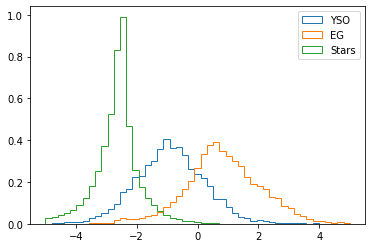

In [66]:
import matplotlib.pyplot as plt
bins= np.linspace(-5,5,20)

c2d_tar = c2d_IRAC_NEW_w_SYNTH[["Target"]].values.astype(int)
c2d_inp = c2d_IRAC_NEW_w_SYNTH[["ir1_flux_c","ir1_d_flux_c","ir2_flux_c","ir2_d_flux_c","ir3_flux_c","ir3_d_flux_c","ir4_flux_c","ir4_d_flux_c",'mp1_flux_c', 'mp1_d_flux_c',"alpha"]].values.astype(float)

YSO = np.where(c2d_tar==0)[0]
alphasYS = c2d_inp[YSO][:,10]

EG = np.where(c2d_tar==1)[0]
alphasEG = c2d_inp[EG][:,10]

ST = np.where(c2d_tar==2)[0]
alphasST = c2d_inp[ST][:,10]

bins= np.linspace(-5,5,50)
plt.hist(alphasYS,bins,histtype='step',label='YSO',density=True)
plt.hist(alphasEG,bins,histtype='step',label='EG',density=True)
plt.hist(alphasST,bins,histtype='step',label='Stars',density=True)
plt.legend()
plt.show()

(array([1.3260e+03, 1.6060e+03, 1.9980e+03, 2.5420e+03, 3.3870e+03,
        4.5590e+03, 6.0490e+03, 8.7390e+03, 1.2413e+04, 1.8257e+04,
        2.5561e+04, 3.9942e+04, 4.6961e+04, 2.2376e+04, 1.2838e+04,
        8.9760e+03, 6.3830e+03, 4.6490e+03, 3.3650e+03, 2.3900e+03,
        1.7940e+03, 1.2950e+03, 9.0500e+02, 7.9800e+02, 6.1900e+02,
        5.4300e+02, 5.1900e+02, 4.1200e+02, 3.2500e+02, 2.6200e+02,
        2.0600e+02, 1.7300e+02, 1.3400e+02, 1.1200e+02, 1.0200e+02,
        1.0100e+02, 8.2000e+01, 8.8000e+01, 6.5000e+01, 4.9000e+01,
        3.0000e+01, 2.3000e+01, 1.1000e+01, 1.2000e+01, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00]),
 array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.5

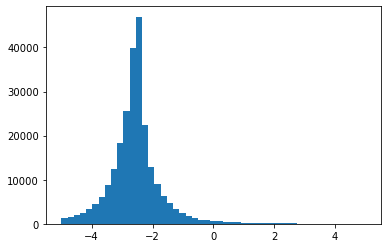

In [46]:
plt.hist(c2d_IRAC[["alpha"]],bins)

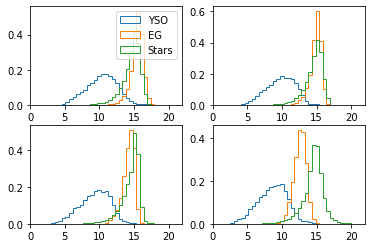

In [47]:
fig, axs = plt.subplots(2,2)
bins= np.linspace(1,21,40)
axs[0][0].hist(c2d_inp[YSO].transpose()[0],bins,histtype='step',label='YSO',density=True)
axs[0][0].hist(c2d_inp[EG].transpose()[0],bins,histtype='step',label='EG',density=True)
axs[0][0].hist(c2d_inp[ST].transpose()[0],bins,histtype='step',label='Stars',density=True)
axs[0][0].legend()

axs[0][1].hist(c2d_inp[YSO].transpose()[2],bins,histtype='step',label='YSO',density=True)
axs[0][1].hist(c2d_inp[EG].transpose()[2],bins,histtype='step',label='EG',density=True)
axs[0][1].hist(c2d_inp[ST].transpose()[2],bins,histtype='step',label='Stars',density=True)

axs[1][0].hist(c2d_inp[YSO].transpose()[4],bins,histtype='step',label='YSO',density=True)
axs[1][0].hist(c2d_inp[EG].transpose()[4],bins,histtype='step',label='EG',density=True)
axs[1][0].hist(c2d_inp[ST].transpose()[4],bins,histtype='step',label='Stars',density=True)

axs[1][1].hist(c2d_inp[YSO].transpose()[6],bins,histtype='step',label='YSO',density=True)
axs[1][1].hist(c2d_inp[EG].transpose()[6],bins,histtype='step',label='EG',density=True)
axs[1][1].hist(c2d_inp[ST].transpose()[6],bins,histtype='step',label='Stars',density=True)

plt.show()

# Rapson Data

In [32]:
df_Rap = pd.read_csv("../Data/Rapson_YSO_EG_ST.tsv",sep=';',comment='#')

df_Rap = df_Rap.replace(r'^\s+$', np.nan, regex=True)
for name in ['3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag','5.8mag', 'e_5.8mag', '8mag', 'e_8mag',"24mag","e_24mag"]:
    df_Rap[name] = df_Rap[name].astype(float)

    
df_Rap.info()
# pd.unique(df_Rap["4.5mag"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10454 entries, 0 to 10453
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        10454 non-null  int64  
 1   RAJ2000   10454 non-null  object 
 2   DEJ2000   10454 non-null  object 
 3   3.6mag    10445 non-null  float64
 4   e_3.6mag  10445 non-null  float64
 5   4.5mag    10450 non-null  float64
 6   e_4.5mag  10450 non-null  float64
 7   5.8mag    10249 non-null  float64
 8   e_5.8mag  10249 non-null  float64
 9   8mag      8484 non-null   float64
 10  e_8mag    8484 non-null   float64
 11  24mag     809 non-null    float64
 12  e_24mag   809 non-null    float64
 13  Class     10454 non-null  object 
dtypes: float64(10), int64(1), object(3)
memory usage: 1.1+ MB


In [33]:
df_Rap.columns

Index(['ID', 'RAJ2000', 'DEJ2000', '3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag',
       '5.8mag', 'e_5.8mag', '8mag', 'e_8mag', '24mag', 'e_24mag', 'Class'],
      dtype='object')

In [34]:
Rap_YSO_1 = pd.merge_ordered(df_Rap[df_Rap["Class"]=='0/I'],df_Rap[df_Rap["Class"]=='II'])
Rap_YSO = pd.merge_ordered(Rap_YSO_1,df_Rap[df_Rap["Class"]=='TD'])
Rap_YSO["Target"] = 0

Rap_EG_1 = pd.merge_ordered(df_Rap[df_Rap["Class"]=='AGN'],df_Rap[df_Rap["Class"]=='PAH'])
Rap_EG = pd.merge_ordered(Rap_EG_1,df_Rap[df_Rap["Class"]=='SHOCK'])
Rap_EG["Target"] = 1

Rap_ST = df_Rap[df_Rap["Class"]=="III/F"]
Rap_ST["Target"] = 2

Rap_NEW_1 = pd.merge_ordered(Rap_YSO,Rap_EG)
Rap_NEW = pd.merge_ordered(Rap_NEW_1, Rap_ST)

print(f"YSO shape: {Rap_YSO.shape}")
print(f"EG shape: {Rap_EG.shape}")
print(f"Stars shape: {Rap_ST.shape}")



# Calculate alphas and add to be consisitent with available bands ([4.5]-[8])
# df_Rap_clean["alpha"] = alpha(df_Rap_clean["4.5mag"].values.astype(float),df_Rap_clean["8mag"].values.astype(float))


YSO shape: (584, 15)
EG shape: (373, 15)
Stars shape: (9497, 15)


In [35]:
Rap_NEW.dropna(subset=['3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag','5.8mag', 'e_5.8mag', '8mag', 'e_8mag'],inplace=True)
Rap_NEW["[3.6]-[4.5]"] = Rap_NEW[["3.6mag"]].values.astype(float) - Rap_NEW[["4.5mag"]].values.astype(float)
Rap_NEW["[4.5]-[5.8]"] = Rap_NEW[["4.5mag"]].values.astype(float) - Rap_NEW[["5.8mag"]].values.astype(float)
Rap_NEW["[5.8]-[8]"] = Rap_NEW[["5.8mag"]].values.astype(float) - Rap_NEW[["8mag"]].values.astype(float)
Rap_NEW["alpha"] = alpha_IR(Rap_NEW["4.5mag"].values.astype(float),Rap_NEW["8mag"].values.astype(float))
# band_names = ['3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag','5.8mag', 'e_5.8mag', '8mag', 'e_8mag', '24mag', 'e_24mag']
# Rap_fluxes = Rap_NEW[band_names].values.astype(float).transpose() 
# Convert magnitudes to flux
# for i, F_0 in enumerate([277.500, 277.500, 179.500, 179.500, 116.600, 116.600, 63.100, 63.100,7.140,7.140]):
#     if i%2==0:
#         Rap_NEW[band_names[i]] = mag_to_mJy(Rap_fluxes[i],F_0) # Convert fluxes in a column to mJy
#     else:
#         Rap_NEW[band_names[i]] = e_mag_to_mJy(Rap_fluxes[i],Rap_fluxes[i-1],F_0) # Convert errors in a column to mJy
Rap_NEW.fillna(-99,inplace=True)

Rap_NEW.head()

,ID,RAJ2000,DEJ2000,3.6mag,e_3.6mag,4.5mag,e_4.5mag,5.8mag,e_5.8mag,8mag,e_8mag,24mag,e_24mag,Class,Target,[3.6]-[4.5],[4.5]-[5.8],[5.8]-[8],alpha
4,34,06 43 10.32,+08 45 11.33,10.32,0.003,10.17,0.003,10.07,0.005,10.03,0.008,-99.0,-99.0,III/F,2,0.15,0.10,0.04,-2.5904
7,45,06 42 42.63,+08 45 20.25,11.62,0.003,11.60,0.004,11.55,0.016,11.56,0.035,-99.0,-99.0,III/F,2,0.02,0.05,-0.01,-2.7544
9,54,06 43 02.63,+08 45 23.95,13.38,0.007,13.28,0.011,13.27,0.050,13.78,0.155,-99.0,-99.0,III/F,2,0.10,0.01,-0.51,-3.6400
11,65,06 43 01.89,+08 45 32.18,12.52,0.005,12.52,0.006,12.40,0.030,12.41,0.053,-99.0,-99.0,III/F,2,0.00,0.12,-0.01,-2.6396
15,84,06 42 53.88,+08 45 38.50,13.71,0.009,13.66,0.013,13.60,0.069,13.67,0.148,-99.0,-99.0,III/F,2,0.05,0.06,-0.07,-2.8364


In [72]:
# #Create synthetic data
# df_Rap_Synth_NEW = df_Rap_clean[['3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag','5.8mag', 'e_5.8mag', '8mag', 'e_8mag',"Target"]]

# # Load a dataset with 3 columns that are not independent
# real_data_YS = df_Rap_Synth_NEW[df_Rap_Synth_NEW["Target"]==0].values.astype(float)
# real_data_EG = df_Rap_Synth_NEW[df_Rap_Synth_NEW["Target"]==1].values.astype(float)

# # Fit a gaussian copula to the data
# copulaYS = GaussianMultivariate()
# copulaYS.fit(real_data_YS)

# # Sample synthetic data
# N_YS = 1000 - real_data_YS.shape[0]
# synthetic_data_YS = copulaYS.sample(N_YS)

# # Fit a gaussian copula to the data
# copulaEG = GaussianMultivariate()
# copulaEG.fit(real_data_EG)

# # Sample synthetic data
# N_EG = 1000 - real_data_EG.shape[0]
# synthetic_data_EG = copulaEG.sample(N_EG)

In [73]:
# Rap_missing = Rap_NEW[['3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag','5.8mag', 'e_5.8mag', '8mag', 'e_8mag',"Target"]]
# Rap_missing = Rap_missing[np.isnan(Rap_missing).any(1)]
# print(Rap_missing.shape)
# Rap_missing_YSO = Rap_missing[Rap_missing["Target"]==0]
# Rap_missing_EG = Rap_missing[Rap_missing["Target"]==1]
# Rap_missing_ST = Rap_missing[Rap_missing["Target"]==2]

# print(c2d_missing_YSO.shape)
# print(c2d_missing_EG.shape)
# print(c2d_missing_ST.shape)

(0, 9)
(0, 11)
(0, 11)
(0, 11)


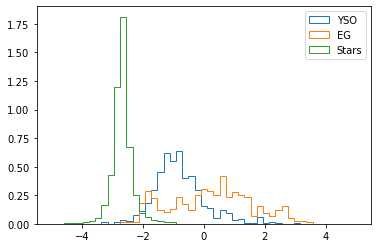

In [36]:
Rap_tar = Rap_NEW[["Target"]].values.astype(int)
Rap_inp = Rap_NEW[["3.6mag","e_3.6mag","4.5mag","e_4.5mag","5.8mag","e_5.8mag","8mag","e_8mag","24mag","e_24mag","[3.6]-[4.5]","[4.5]-[5.8]","[5.8]-[8]","alpha"]].values.astype(float)
Rap_alp = Rap_NEW[["alpha"]].values.astype(float)
EG = np.where(Rap_tar==1)[0]
alphasEG = Rap_alp[EG]

YSO = np.where(Rap_tar==0)[0]
alphasYS = Rap_alp[YSO]

ST = np.where(Rap_tar==2)[0]
alphasST = Rap_alp[ST]
import matplotlib.pyplot as plt
bins= np.linspace(-5,5,50)
plt.hist(alphasYS,bins,histtype='step',label='YSO',density=True)
plt.hist(alphasEG,bins,histtype='step',label='EG',density=True)
plt.hist(alphasST,bins,histtype='step',label='Stars',density=True)
plt.legend()
plt.show()

In [37]:
np.save("../Data/NGC2264_3COL_INP.npy",Rap_NEW[["3.6mag","e_3.6mag","4.5mag","e_4.5mag","5.8mag","e_5.8mag","8mag","e_8mag","24mag","e_24mag","[3.6]-[4.5]","[4.5]-[5.8]","[5.8]-[8]","alpha"]].values.astype(float))
np.save("../Data/NGC2264_3COL_TAR.npy",Rap_NEW[["Target"]].values.astype(int))

# Data from CM21


If we follow the values CM21 used for each class, we should be using:
* Training
    * 1472 YSOs (331 CI and 1141 CII)
    * 857 EG (231 Gals, 529 AGN, 27 PAHs 70 Shocks)
    * 1257 Stars
* Validation
    * 613 YSOs (82 CI and 531 CII)
    * 405 EG (104 Gals, 278 AGNs, 6 PAHs, 17 Shocks)
    * 4359 Stars

We will use the above input and compare to using 1000 of each class. There are a total of:
* 3073 YSOs
* 2034 EG
* 21 796 Stars


# SPICY YSO Classification

In [5]:
df_SPICY = pd.read_csv("../Data_and_Results/SPICY_YSO_Subclasses.csv",comment='#')

df_SPICY.head()

,SPICY,RAdeg DEdeg,GLON GLAT,p1,p2,p3,class,Si,PAH,alpha,...,ag.1,ag.2,ag.3,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,WISEA,ZTFDR3
0,1,125.664811 -37.551349,255.975183 -0.253369,0.710000,,,ClassII,0,0,-1.51695368300395E+00,...,2,2,2,08223956-3733048,,,5541983493883598976,,J082239.55-373304.5,NaN
1,2,125.795513 -37.585000,256.062070 -0.187675,0.690000,,,ClassII,0,0,-6.43206342197073E-01,...,2,2,2,08231092-3735060,,,5541980848188474496,,J082310.90-373505.9,NaN
2,3,125.860244 -37.577463,256.085297 -0.141319,0.870000,,,FS,0,0,-2.14090416881411E-03,...,2,2,2,08232646-3734388,,,5541969475116705664,,J082326.45-373438.8,NaN
3,4,125.946863 -37.770809,256.282985 -0.196119,0.530000,,,ClassI,0,0,3.37295842881326E-01,...,4,2,4,,,,,,J082347.25-374615.0,NaN
4,5,126.003155 -37.126075,255.780917 0.210831,0.540000,,,FS,0,0,-2.78597489454348E-01,...,2,2,2,08240071-3707341,,,5542020537982099840,,J082400.75-370733.7,NaN


In [6]:
df_SPICY_IRAC = df_SPICY[[" SPICY","3.6mag","e_3.6mag","4.5mag","e_4.5mag","5.8mag","e_5.8mag","8.0mag","e_8.0mag","class    "]]
df_SPICY_IRAC = df_SPICY_IRAC[df_SPICY_IRAC["8.0mag"]!='      ']
df_SPICY_IRAC = df_SPICY_IRAC[df_SPICY_IRAC["5.8mag"]!='      ']

df_SPICY_IRAC.head()

,SPICY,3.6mag,e_3.6mag,4.5mag,e_4.5mag,5.8mag,e_5.8mag,8.0mag,e_8.0mag,class
0,1,13.158,0.063,12.800,0.104,12.470,0.153,12.009,0.083,ClassII
1,2,13.180,0.059,12.727,0.097,12.241,0.120,11.404,0.059,ClassII
2,3,11.703,0.052,11.197,0.061,10.674,0.059,9.576,0.034,FS
3,4,14.271,0.096,13.398,0.084,12.462,0.142,11.478,0.045,ClassI
4,5,13.198,0.065,12.393,0.084,11.726,0.077,10.848,0.048,FS


In [11]:
df_SPICY_CI = df_SPICY_IRAC[df_SPICY_IRAC["class    "]=="ClassI   "]
df_SPICY_CI["Target"] = 0

df_SPICY_CFS = df_SPICY_IRAC[df_SPICY_IRAC["class    "]=="FS       "]
df_SPICY_CFS["Target"] = 1

df_SPICY_CII = df_SPICY_IRAC[df_SPICY_IRAC["class    "]=="ClassII  "]
df_SPICY_CII["Target"] = 2

df_SPICY_CIII = df_SPICY_IRAC[df_SPICY_IRAC["class    "]=="ClassIII "]
df_SPICY_CIII["Target"] = 3

df_YSO_NEW_1 = pd.merge_ordered(df_SPICY_CI,df_SPICY_CII)
df_YSO_NEW_2 = pd.merge_ordered(df_SPICY_CFS,df_SPICY_CIII)
df_YSO_NEW = pd.merge_ordered(df_YSO_NEW_1,df_YSO_NEW_2)

df_YSO_NEW['alphas'] = alpha(df_YSO_NEW["4.5mag"].values.astype(float),df_YSO_NEW["8.0mag"].values.astype(float))

df_YSO_NEW.head()

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_9120/443959090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPICY_CI["Target"] = 0
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_9120/443959090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPICY_CFS["Target"] = 1
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_9120/443959090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,SPICY,3.6mag,e_3.6mag,4.5mag,e_4.5mag,5.8mag,e_5.8mag,8.0mag,e_8.0mag,class,Target,alphas
0,1,13.158,0.063,12.800,0.104,12.470,0.153,12.009,0.083,ClassII,2,-1.52276
1,2,13.180,0.059,12.727,0.097,12.241,0.120,11.404,0.059,ClassII,2,-0.65028
2,3,11.703,0.052,11.197,0.061,10.674,0.059,9.576,0.034,FS,1,-0.16156
3,4,14.271,0.096,13.398,0.084,12.462,0.142,11.478,0.045,ClassI,0,0.32880
4,5,13.198,0.065,12.393,0.084,11.726,0.077,10.848,0.048,FS,1,-0.28620


In [12]:
Inputs = df_YSO_NEW[["3.6mag","e_3.6mag","4.5mag","e_4.5mag","5.8mag","e_5.8mag","8.0mag","e_8.0mag","alphas"]].values.astype(float)
Targets = df_YSO_NEW[["Target"]].values.astype(float)


np.save("../Data_and_Results/Inputs_YSO_Train.npy",Inputs)
np.save("../Data_and_Results/Targets_YSO_Train.npy",Targets)

In [10]:
print(df_SPICY_CI.shape)
print(df_SPICY_CII.shape)
print(df_SPICY_CFS.shape)
print(df_SPICY_CIII.shape)

(15596, 11)
(59561, 11)
(23563, 11)
(5333, 11)


# NGC 3324

In [65]:
def converttbldatatocsvformat(filename, header):
    csv = open("".join([path, filename, ".csv"]), "w+")
    csv.write(header + "\n")
    tbl = open("".join([path, filename, ".tbl"]), "r")
    lines = tbl.readlines()
    for line in lines:
        length = len(line)
        line = line[:length - 2] + line[length-1:]
        line = line.replace(",","N")
        line = line.replace(",",",")
        csv.write(line)
    tbl.close()
    csv.close()

file = "VelaCarC_l286"
path = "../../../ngc3324/"
# head = "#designation,tmass_designation,tmass_cntr,    l     ,   b     , dl , db ,  ra    ,    dec   ,  dra , ddec ,csf, mag_J,  dJ_m, mag_H,  dH_m,mag_Ks, dKs_m,mag3_6, d3_6m,mag4_5, d4_5m,mag5_8, d5_8m,mag8_0, d8_0m,   f_J    ,   df_J   ,   f_H    ,   df_H   ,   f_Ks   ,  df_Ks   ,   f3_6   ,  df3_6   ,   f4_5   ,   df4_5  ,   f5_8   ,  df5_8   ,   f8_0   ,  df8_0   , rms_f3_6 , rms_f4_5 , rms_f5_8 , rms_f8_0 ,  sky_3_6 ,  sky_4_5 ,  sky_5_8 ,  sky_8_0 ,  sn_J,  sn_H, sn_Ks,sn_3_6,sn_4_5,sn_5_8,sn_8_0,dens_3_6,dens_4_5,dens_5_8,dens_8_0, m3_6, m4_5, m5_8, m8_0, n3_6, n4_5, n5_8, n8_0,   sqf_J  ,   sqf_H  ,  sqf_Ks  ,  sqf_3_6 ,  sqf_4_5 ,  sqf_5_8 ,  sqf_8_0 ,mf3_6,mf4_5,mf5_8,mf8_0"
head = "designation    tmass_designation    tmass_cntr        l            b          dl      db       ra            dec         dra      ddec     csf     mag_J      dJ_m     mag_H      dH_m    mag_Ks     dKs_m    mag3_6     d3_6m    mag4_5     d4_5m    mag5_8     d5_8m    mag8_0     d8_0m       f_J           df_J          f_H           df_H          f_Ks         df_Ks          f3_6         df3_6          f4_5          df4_5         f5_8         df5_8          f8_0         df8_0        rms_f3_6      rms_f4_5      rms_f5_8      rms_f8_0       sky_3_6       sky_4_5       sky_5_8       sky_8_0       sn_J      sn_H     sn_Ks    sn_3_6    sn_4_5    sn_5_8    sn_8_0    dens_3_6    dens_4_5    dens_5_8    dens_8_0     m3_6     m4_5     m5_8     m8_0     n3_6     n4_5     n5_8     n8_0       sqf_J         sqf_H        sqf_Ks        sqf_3_6       sqf_4_5       sqf_5_8       sqf_8_0     mf3_6    mf4_5    mf5_8    mf8_0"

converttbldatatocsvformat(file,head)

In [159]:
# head = ["designation","tmass_designation","tmass_cntr","  l     ","   b     "," dl "," db ","   ra   ","   dec  "," dra","ddec ","csf","mag_J","dJ_m", "mag_H",  "dH_m","mag_Ks", "dKs_m","mag3_6",\
#      "d3_6m","mag4_5", "d4_5m","mag5_8", "d5_8m","mag8_0", "d8_0m",   "f_J   ","  df_J  ","  f_H   ","  df_H  ","  f_Ks  "," df_Ks  ","  f3_6  "," df3_6  ","  f4_5  ","  df4_5 ","  f5_8  "," df5_8  ",\
#          "  f8_0  "," df8_0  ","rms_f3_6","rms_f4_5","rms_f5_8","rms_f8_0"," sky_3_6"," sky_4_5"," sky_5_8"," sky_8_0"," sn_J",  "sn_H", "sn_Ks","sn_3_6","sn_4_5","sn_5_8","sn_8_0","dens_3_6",\
#              "dens_4_5","dens_5_8","dens_8_0", "m3_6", "m4_5", "m5_8", "m8_0", "n3_6", "n4_5", "n5_8", "n8_0",   "sqf_J ","  sqf_H "," sqf_Ks "," sqf_3_6"," sqf_4_5"," sqf_5_8"," sqf_8_0" ,"mf3_6","mf4_5","mf5_8","mf8_0"]

n33_df = pd.read_csv("../../../ngc3324/VelaCarC_l286.csv",delim_whitespace=True,comment="#",header=0,index_col=1)
print(n33_df.info())

# n33_DF = n33_df[['ra', 'dec','mag_J','dJ_m','mag_H','dH_m','mag_Ks','dKs_m','mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8','d5_8m', 'mag8_0', 'd8_0m']]
n33_DF = n33_df[['ra', 'dec','f_J','df_J','f_H','df_H','f_Ks','df_Ks','f3_6', 'df3_6', 'f4_5', 'df4_5', 'f5_8','df5_8', 'f8_0', 'df8_0']]

n33_DF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 76592 entries, G286.0000-01.6076 to G286.9999+00.2502
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   designation        76592 non-null  object 
 1   tmass_designation  71891 non-null  object 
 2   tmass_cntr         76592 non-null  int64  
 3   l                  76592 non-null  float64
 4   b                  76592 non-null  float64
 5   dl                 76592 non-null  float64
 6   db                 76592 non-null  float64
 7   ra                 76592 non-null  float64
 8   dec                76592 non-null  float64
 9   dra                76592 non-null  float64
 10  ddec               76592 non-null  float64
 11  csf                76592 non-null  int64  
 12  mag_J              76592 non-null  float64
 13  dJ_m               76592 non-null  float64
 14  mag_H              76592 non-null  float64
 15  dH_m               76592 non-null  float64
 16 

,ra,dec,f_J,df_J,f_H,df_H,f_Ks,df_Ks,f3_6,df3_6,f4_5,df4_5,f5_8,df5_8,f8_0,df8_0
G286.0000-01.6076,157.553803,-59.753506,1.6800,0.07582,1.9750,0.10550,1.6750,0.10490,0.9148,0.09218,-999.9000,-999.90000,-999.90,-999.900,-999.90,-999.9000
G286.0000-01.4378,157.726576,-59.607751,232.1000,7.69600,199.5000,7.71700,140.3000,4.00600,57.4000,1.93400,36.5900,1.54300,24.86,1.015,13.58,0.3781
G286.0000-00.2122,158.929997,-58.549566,0.5486,0.06013,1.2610,0.08943,1.5040,0.09279,0.9434,0.07279,0.7405,0.07462,-999.90,-999.900,-999.90,-999.9000
G286.0000-00.8792,158.284282,-59.126860,0.9005,0.07382,1.1770,0.10080,0.8217,0.09839,0.5763,0.05122,0.4158,0.06240,-999.90,-999.900,-999.90,-999.9000
G286.0000-00.0972,159.039269,-58.449703,-999.9000,-999.90000,0.8067,0.09064,1.1930,0.10660,0.8709,0.08955,0.7654,0.10530,-999.90,-999.900,-999.90,-999.9000


In [76]:
# np.save("../Data/NGC3324_NAN_2MASS+SPITZ_INP.npy", n33_DF.values.astype(float))

In [77]:

# n33_DF.drop(n33_DF[n33_DF['mag3_6']>99.].index,inplace=True)
# n33_DF.drop(n33_DF[n33_DF['mag4_5']>99.].index,inplace=True)
# n33_DF.drop(n33_DF[n33_DF['mag5_8']>99.].index,inplace=True)
# n33_DF.drop(n33_DF[n33_DF['mag8_0']>99.].index,inplace=True)

# n33_DF["mag24"] = [(-99)]*len(n33_DF[['mag3_6']].values)
# n33_DF["d24m"] = [(-99)]*len(n33_DF[['mag3_6']].values)
# n33_DF["alpha"] = alpha_IR(n33_DF["mag4_5"].values.astype(float),n33_DF["mag8_0"].values.astype(float))

# n33_DF.head()


In [78]:
# n33_DF.hist("alpha")

In [79]:
# n33_DF.info()

In [80]:
# np.save("../Data/NGC3324_INP.npy",n33_DF[["ra","dec","mag3_6",'d3_6m', 'mag4_5', 'd4_5m', 'mag5_8',\
#        'd5_8m', 'mag8_0', 'd8_0m','mag24', 'd24m',"alpha"]].values.astype(float))


In [20]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt

In [81]:

# image_file = "../../../ngc3324/FITS/JWST_f187n.fits"
# filename = get_pkg_data_filename(image_file)

# h = fits.getheader(image_file)

# f = fits.open(image_file)

# wcs = WCS(f[1].header)

In [82]:



# plt.style.use('dark_background')
# fig, ax = plt.subplots(figsize=(24,14),dpi=100)
# ax = plt.subplot(projection=wcs)

# plt.grid(color='white', ls='solid')
# plt.imshow(f[1].data,cmap='hot',vmin=0,vmax=100,origin='lower')
# ymax, ymin = ax.get_ylim()
# plt.colorbar()

# ras, decs = wcs.wcs_pix2world(np.linspace(-2000,17000,100), np.linspace(-100,9000,100), 1)

# n33_nan = n33_df[['ra', 'dec','mag_J','dJ_m','mag_H','dH_m','mag_Ks','dKs_m','mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8','d5_8m', 'mag8_0', 'd8_0m']].values.astype(float)

# n33_nan = n33_nan[n33_nan[:,0]>min(ras)]
# n33_nan = n33_nan[n33_nan[:,0]<max(ras)]
# n33_nan = n33_nan[n33_nan[:,1]>min(decs)]
# n33_nan = n33_nan[n33_nan[:,1]<max(decs)]

# plt.scatter(n33_nan[:,0],n33_nan[:,1],transform=ax.get_transform('fk5'))

In [94]:
0.92*0.049*(1594*10**(-14.943/2.5))

7.573074416708612e-05

In [102]:
e_mag_to_Jy(0.049,14.943,1594)

7.581586200020797e-05

In [153]:
band_names = ['mag_J','dJ_m','mag_H','dH_m','mag_Ks','dKs_m','mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8','d5_8m', 'mag8_0', 'd8_0m']

df_n33_nan = n33_df[np.concatenate((['ra','dec'],band_names))]
df_n33_nan.where(df_n33_nan[band_names]<98,inplace=True)
df_n33_nan.head()

,ra,dec,mag_J,dJ_m,mag_H,dH_m,mag_Ks,dKs_m,mag3_6,d3_6m,mag4_5,d4_5m,mag5_8,d5_8m,mag8_0,d8_0m
G286.0000-01.6076,157.553803,-59.753506,14.943,0.049,14.287,0.058,14.000,0.068,13.718,0.109,NaN,NaN,NaN,NaN,NaN,NaN
G286.0000-01.4378,157.726576,-59.607751,9.592,0.036,9.276,0.042,9.192,0.031,9.224,0.037,9.228,0.046,9.163,0.044,9.185,0.03
G286.0000-00.2122,158.929997,-58.549566,16.158,0.119,14.774,0.077,14.117,0.067,13.685,0.084,13.462,0.109,NaN,NaN,NaN,NaN
G286.0000-00.8792,158.284282,-59.126860,15.620,0.089,14.849,0.093,14.773,0.130,14.220,0.097,14.089,0.163,NaN,NaN,NaN,NaN
G286.0000-00.0972,159.039269,-58.449703,NaN,NaN,15.259,0.122,14.368,0.097,13.771,0.112,13.427,0.149,NaN,NaN,NaN,NaN


In [154]:

for i, F_0 in enumerate([1594, 1594, 1024, 1024, 666.7,666.7,277.500, 277.500, 179.500, 179.500, 116.600, 116.600, 63.100, 63.100]):
    if i%2==0:
        df_n33_nan[band_names[i]] = mag_to_Jy(m=n33_df[band_names[i]].values,F0=F_0) # Convert mags in a column to fluxes
    else:
        df_n33_nan[band_names[i]] = e_mag_to_Jy(e_m=n33_df[band_names[i]].values,m=n33_df[band_names[i-1]].values,F0=F_0) # Convert errors in a column to flux

ras, decs = wcs.wcs_pix2world(np.linspace(-2000,17000,100), np.linspace(-100,9000,100), 1)
df_n33_nan.where(np.floor(np.log10(df_n33_nan[band_names]))>-35,inplace=True)
print(df_n33_nan.head())
n33_nan = df_n33_nan.values.astype(float)
n33_nan = n33_nan[n33_nan[:,0]>min(ras)]
n33_nan = n33_nan[n33_nan[:,0]<max(ras)]
n33_nan = n33_nan[n33_nan[:,1]>min(decs)]
n33_nan = n33_nan[n33_nan[:,1]<max(decs)]

df_n33_nan = pd.DataFrame(data=n33_nan, columns=np.concatenate((['ra','dec'],band_names)))
# df_n33_nan.head()
df_n33_nan.to_csv('../../../ngc3324/Spitzer_CosmicCliffs.csv')

                           ra        dec     mag_J      dJ_m     mag_H  \
G286.0000-01.6076  157.553803 -59.753506  0.001680  0.000076  0.001975   
G286.0000-01.4378  157.726576 -59.607751  0.232107  0.007696  0.199480   
G286.0000-00.2122  158.929997 -58.549566  0.000549  0.000060  0.001261   
G286.0000-00.8792  158.284282 -59.126860  0.000901  0.000074  0.001177   
G286.0000-00.0972  159.039269 -58.449703       NaN       NaN  0.000807   

                       dH_m    mag_Ks     dKs_m    mag3_6     d3_6m    mag4_5  \
G286.0000-01.6076  0.000105  0.001675  0.000105  0.000904  0.000091       NaN   
G286.0000-01.4378  0.007717  0.140324  0.004007  0.056710  0.001933  0.036548   
G286.0000-00.2122  0.000089  0.001504  0.000093  0.000932  0.000072  0.000740   
G286.0000-00.8792  0.000101  0.000822  0.000098  0.000569  0.000051  0.000415   
G286.0000-00.0972  0.000091  0.001193  0.000107  0.000861  0.000089  0.000764   

                      d4_5m    mag5_8     d5_8m    mag8_0     d8_0m 

In [158]:
n33_DF = df_n33_nan
n33_DF.dropna(inplace=True)

n33_DF["mag24"] = [(-99)]*len(n33_DF[['mag3_6']].values)
n33_DF["d24m"] = [(-99)]*len(n33_DF[['mag3_6']].values)
n33_DF["alpha"] = alpha_IR(n33_DF["mag4_5"].values.astype(float),n33_DF["mag8_0"].values.astype(float))

n33_DF.head()

np.save("../Data/CosmicCliffs_INP.npy",n33_DF[["ra","dec","mag3_6",'d3_6m', 'mag4_5', 'd4_5m', 'mag5_8',\
       'd5_8m', 'mag8_0', 'd8_0m','mag24', 'd24m',"alpha"]].values.astype(float))

In [19]:
print(np.shape(n33_nan))


(826, 10)


In [20]:
n33_nonan = n33_DF.values.astype(float)


n33_nonan = n33_nonan[n33_nonan[:,0]>min(ras)]
n33_nonan = n33_nonan[n33_nonan[:,0]<max(ras)]
n33_nonan = n33_nonan[n33_nonan[:,1]>min(decs)]
n33_nonan = n33_nonan[n33_nonan[:,1]<max(decs)]

print(np.shape(n33_nonan))

(162, 13)
